### Importando as bibliotecas

In [2]:
#Importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

### Limpeza e Tratamento dos Dados

In [3]:
# Lendo o Arquivo
df = pd.read_csv('Acessos_Banda_Larga_Fixa_Total.csv', sep=';')

#### Criando a base de 2011 a 2022

In [4]:
# Removendo os anos de 2007 a 2010 que estão incompletos, só tem dados trimestrais
# Dados mensais faltantes afetam alguns algoritimos de predição
# Como são dados antigos com mais de 10 anos, optamos pela eliminação

In [5]:
# Removendo os anos de 2007 a 2010 que não estão completos
df_remove = df.loc[(df['Ano'] == 2007) | (df['Ano'] == 2008) | (df['Ano'] == 2009) | (df['Ano'] == 2010)]
df = df.drop(df_remove.index)
df

,Ano,Mês,Acessos
0,2022,7,42776664
1,2022,6,42732071
2,2022,5,42076061
3,2022,4,42636758
4,2022,3,42768917
...,...,...,...
134,2011,5,15486330
135,2011,4,15260984
136,2011,3,15058564
137,2011,2,14764348


In [6]:
# Ordenado os dados em ordem crescente e refazendo o index.
df = df.sort_values(by=['Ano', 'Mês'], ignore_index=True)
df

,Ano,Mês,Acessos
0,2011,1,14508818
1,2011,2,14764348
2,2011,3,15058564
3,2011,4,15260984
4,2011,5,15486330
...,...,...,...
134,2022,3,42768917
135,2022,4,42636758
136,2022,5,42076061
137,2022,6,42732071


In [8]:
# Criando um campo Data com o campos 'Anos' e 'Mês'
df['Data'] = df['Ano'].astype('str') + '-' + df['Mês'].astype('str') 
df.head(13)

,Ano,Mês,Acessos,Data
0,2011,1,14508818,2011-1
1,2011,2,14764348,2011-2
2,2011,3,15058564,2011-3
3,2011,4,15260984,2011-4
4,2011,5,15486330,2011-5
5,2011,6,15622713,2011-6
6,2011,7,16011957,2011-7
7,2011,8,16234050,2011-8
8,2011,9,16409889,2011-9
9,2011,10,16600169,2011-10


In [9]:
# Apagando os campos 'Ano' e 'Mês' que não serão mais utilizados.
del df['Ano']
del df['Mês']
df.head()

,Acessos,Data
0,14508818,2011-1
1,14764348,2011-2
2,15058564,2011-3
3,15260984,2011-4
4,15486330,2011-5


In [10]:
# Trazendo o campo 'Data' para primeira posição do DataFrame
df = df[['Data', 'Acessos']]
df.head()

,Data,Acessos
0,2011-1,14508818
1,2011-2,14764348
2,2011-3,15058564
3,2011-4,15260984
4,2011-5,15486330


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     139 non-null    object
 1   Acessos  139 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [15]:
# Gravando os dados já tratados e sem index.
# Esse arquivo será usado nas análises e projeções de séries temporais.
df.to_csv('Acessos_Banda_Larga_Fixa_Total_2011_2022.csv', index = False)

In [17]:
#Importação dos dados
df = pd.read_csv('Acessos_Banda_Larga_Fixa_Total_2011_2022.csv',index_col='Data',parse_dates=True)
df.index.freq = 'MS'
df.head(5)

,Acessos
Data,
2011-01-01,14508818
2011-02-01,14764348
2011-03-01,15058564
2011-04-01,15260984
2011-05-01,15486330


In [18]:
df.shape

(139, 1)

In [19]:
df.index.min(), df.index.max()

(Timestamp('2011-01-01 00:00:00', freq='MS'),
 Timestamp('2022-07-01 00:00:00', freq='MS'))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 2011-01-01 to 2022-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Acessos  139 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


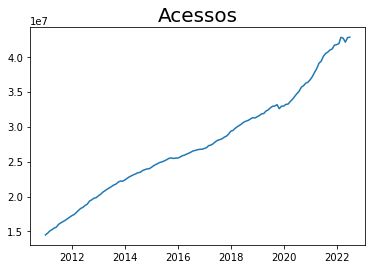

In [21]:
#Visualização dos dados
plt.title('Acessos', size=20)
plt.plot(df);

#### Criando a Base só do período da covid (2020 a 2022)

In [23]:
# Lendo o Arquivo
df = pd.read_csv('Acessos_Banda_Larga_Fixa_Total.csv', sep=';')

In [24]:
# Criando uma série só com o período da covid (2020 a 2022)
# Removendo os anos de 2007 a 2019
df_remove = df.loc[(df['Ano'] == 2007) | (df['Ano'] == 2008) | (df['Ano'] == 2009) | (df['Ano'] == 2010)
                  |(df['Ano'] == 2011) | (df['Ano'] == 2012) | (df['Ano'] == 2013) | (df['Ano'] == 2014)
                  |(df['Ano'] == 2015) | (df['Ano'] == 2016) | (df['Ano'] == 2017) | (df['Ano'] == 2018)
                  |(df['Ano'] == 2019)]
df = df.drop(df_remove.index)
df

,Ano,Mês,Acessos
0,2022,7,42776664
1,2022,6,42732071
2,2022,5,42076061
3,2022,4,42636758
4,2022,3,42768917
5,2022,2,41872424
6,2022,1,41716841
7,2021,12,41657433
8,2021,11,41104946
9,2021,10,40956803


In [25]:
# Ordenado os dados em ordem crescente e refazendo o index.
df = df.sort_values(by=['Ano', 'Mês'], ignore_index=True)
df

,Ano,Mês,Acessos
0,2020,1,32937919
1,2020,2,33175908
2,2020,3,33216768
3,2020,4,33582173
4,2020,5,33901720
5,2020,6,34319021
6,2020,7,34711249
7,2020,8,35047193
8,2020,9,35643759
9,2020,10,35843054


In [26]:
# Criando um campo Data com o campos 'Anos' e 'Mês'.  O '01' para dia será automatico.
df['Data'] = df['Ano'].astype('str') + '-' + df['Mês'].astype('str') # + '-' + '01'
df.head(13)

,Ano,Mês,Acessos,Data
0,2020,1,32937919,2020-1
1,2020,2,33175908,2020-2
2,2020,3,33216768,2020-3
3,2020,4,33582173,2020-4
4,2020,5,33901720,2020-5
5,2020,6,34319021,2020-6
6,2020,7,34711249,2020-7
7,2020,8,35047193,2020-8
8,2020,9,35643759,2020-9
9,2020,10,35843054,2020-10


In [27]:
# Apagando os campos 'Ano' e 'Mês' que não serão mais utilizados.
del df['Ano']
del df['Mês']
df.head()

,Acessos,Data
0,32937919,2020-1
1,33175908,2020-2
2,33216768,2020-3
3,33582173,2020-4
4,33901720,2020-5


In [28]:
# Trazendo o campo 'Data' para primeira posição do DataFrame
df = df[['Data', 'Acessos']]
df.head()

,Data,Acessos
0,2020-1,32937919
1,2020-2,33175908
2,2020-3,33216768
3,2020-4,33582173
4,2020-5,33901720


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     31 non-null     object
 1   Acessos  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [31]:
# Gravando os dados já tratados e sem index.
# Esse arquivo será usado nas análises e projeções de séries temporais.
df.to_csv('Acessos_Banda_Larga_Fixa_Total_2020_2022.csv', index = False)

In [32]:
#Importação dos dados
df = pd.read_csv('Acessos_Banda_Larga_Fixa_Total_2020_2022.csv',index_col='Data',parse_dates=True)
df.index.freq = 'MS'
df.head(5)

,Acessos
Data,
2020-01-01,32937919
2020-02-01,33175908
2020-03-01,33216768
2020-04-01,33582173
2020-05-01,33901720


In [33]:
df.shape

(31, 1)

In [34]:
df.index.min(), df.index.max()

(Timestamp('2020-01-01 00:00:00', freq='MS'),
 Timestamp('2022-07-01 00:00:00', freq='MS'))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2020-01-01 to 2022-07-01
Freq: MS
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Acessos  31 non-null     int64
dtypes: int64(1)
memory usage: 496.0 bytes


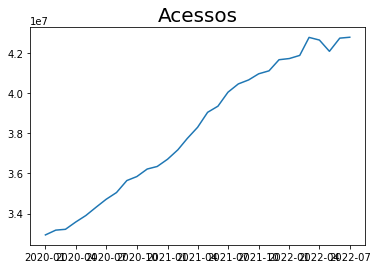

In [36]:
#Visualização dos dados
plt.title('Acessos', size=20)
plt.plot(df);